In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

import utils

In [4]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Berlin-Center" #"Anaheim" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Anaheim":
    link_file =  "Anaheim_net.tntp"
    trip_file =  "Anaheim_trips.tntp"
elif scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    raise ValueError(f"Unknown scenario {scenario}")

In [5]:
%%time
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bush-based", block_centroids=False, rgap=5*1e-5)

bush-based Assignment STATS
 Initialised data structures, num nodes = 12981, num links = 28370
 0th iteration done, cost = 17175346.0
Iteration 1, computed gap: 0.03523369394561715, computed objective: 13572901.0
Iteration 2, computed gap: 0.008124234031658073, computed objective: 13446520.0
Iteration 3, computed gap: 0.0018462100719774943, computed objective: 13425886.0
Iteration 4, computed gap: 0.0005136246907306852, computed objective: 13421236.0
Iteration 5, computed gap: 0.00017223551787159952, computed objective: 13420094.0
Iteration 6, computed gap: 7.091238174428138e-05, computed objective: 13419739.0
bush-based Assignment finished. 6 iterations and 7.091238174428138e-05 final gap
CPU times: user 19min 51s, sys: 13min 37s, total: 33min 29s
Wall time: 4min 54s


In [6]:
%%time
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=False, rgap=5*1e-5)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.3800567793701656,0.5300666634760473
3,0.02995166794864988,0.4419368001798535
4,0.011215453493207569,0.9740669340921474
5,0.018651911495302792,0.207438236660486
6,0.005588851085212455,0.23649241559763462
7,0.0034952930085653255,0.6993747625312287
8,0.006823974042287565,0.14055669550649857
9,0.0024604856164390475,0.15286896543449707
10,0.002205272541373415,0.293308282199271
11,0.0021288156703840886,0.6046893730021614
12,0.002492468003123535,0.07319402743157027
13,0.00131718613100849,0.08685959866044622
14,0.0009672259824663231,0.11058853630707233
15,0.001022491311937068,0.2883890249916652
16,0.0010965872573139763,0.38329827219457985
17,0.0010136654495672723,0.8179597775527969
18,0.0011814305462246335,0.041757769616305375
19,0.0006496400262115819,0.05098914445432661
20,0.0005304649833509292,0.12421073186907841
21,0.0006185390637040683,0.1536965273896091
22,0.0005388025513493729,0.18786483242656604
23,0.0004177885118343967

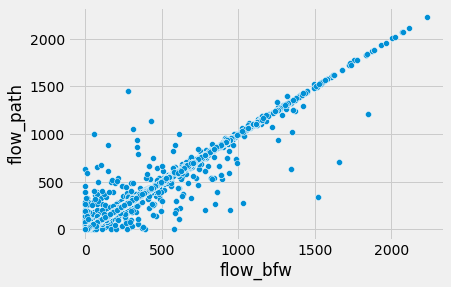

max diff in flow = 1177.696
max rel diff in flow = inf%


,link_id_bfw,a_node,b_node,capacity_bfw,alpha_bfw,beta_bfw,direction_bfw,flow_bfw,link_id_path,capacity_path,alpha_path,beta_path,direction_path,flow_path,abs_change,rel_change
2092,2092,419,8720,999999.0,0.0,4.0,1,279.816726,2092,999999.0,0.0,4.0,1,1457.512451,1177.695725,4.208811
19490,19490,8720,413,999999.0,0.0,4.0,1,279.816726,19490,999999.0,0.0,4.0,1,1457.512451,1177.695725,4.208811
18848,18848,8426,413,999999.0,0.0,4.0,1,1520.377608,18848,999999.0,0.0,4.0,1,343.900146,1176.477461,0.773806
2090,2090,419,8426,999999.0,0.0,4.0,1,1520.377608,2090,999999.0,0.0,4.0,1,343.900146,1176.477461,0.773806
2060,2060,413,8426,999999.0,0.0,4.0,1,1660.650390,2060,999999.0,0.0,4.0,1,710.855652,949.794738,0.571941
18849,18849,8426,419,999999.0,0.0,4.0,1,1660.650390,18849,999999.0,0.0,4.0,1,710.855652,949.794738,0.571941
19491,19491,8720,419,999999.0,0.0,4.0,1,54.129914,19491,999999.0,0.0,4.0,1,1002.452454,948.322540,17.519380
2061,2061,413,8720,999999.0,0.0,4.0,1,54.129914,2061,999999.0,0.0,4.0,1,1002.452454,948.322540,17.519380
418,418,84,10750,999999.0,0.0,4.0,1,1028.536830,418,999999.0,0.0,4.0,1,281.382904,747.153926,0.726424
22833,22833,10321,84,999999.0,0.0,4.0,1,946.651861,22833,999999.0,0.0,4.0,1,199.497955,747.153906,0.789259


In [8]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path'])
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');
plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result.sort_values(by=['abs_change'], ascending=False).head(10))